<a href="https://colab.research.google.com/github/begad-tamim/Hacktoberfest2022/blob/main/ITI_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/linear_regression

### Defining and plotting our dataset

In [ ]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


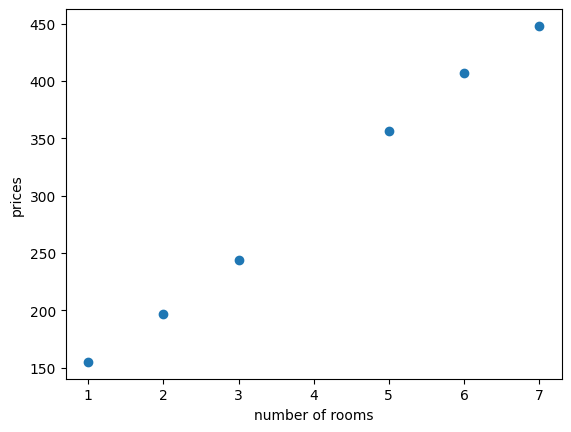

In [ ]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [ ]:

#implement square_trick and return the new price_per_room and base_price
# calculate the predicted price then calculate the new price_per_room and base_price
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):

    predicted_price = (price_per_room * num_rooms) + base_price

    error = price - predicted_price

    price_per_room = price_per_room + (learning_rate * error * num_rooms)

    base_price = base_price + (learning_rate * error)

    return price_per_room, base_price

In [ ]:

#implement absolute_trick and return the new price_per_room and base_price
# calculate the predicted price then calculate the new price_per_room and base_price
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):

  predicted_price = (base_price + price_per_room * num_rooms)

  if price > predicted_price:
    price_per_room = price_per_room + (learning_rate * num_rooms)
    base_price = base_price + learning_rate

  else:
    price_per_room = price_per_room - (learning_rate * num_rooms)
    base_price = base_price - learning_rate

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

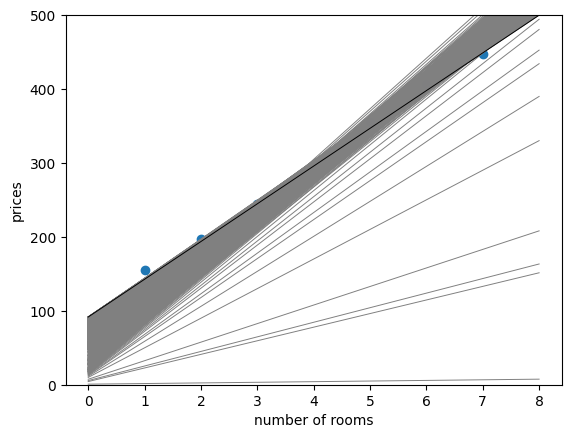

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for iter in range(epochs):
      if(True):
        utils.draw_line(price_per_room, base_price, starting = 0, ending = 8)
      x = rd.randint(0,len(features) - 1)
      num_rooms = features[x]
      price = labels[x]
      price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)


    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

### Plotting the error function

In [ ]:
# The root mean square error function
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
def rmse(labels, predictions):
    squared_diff = (labels - predictions) ** 2

    mean_squared_diff = np.mean(squared_diff)

    rmse = np.sqrt(mean_squared_diff)
    return rmse

Price per room: 50.65781332767556
Base price: 99.79504258184782


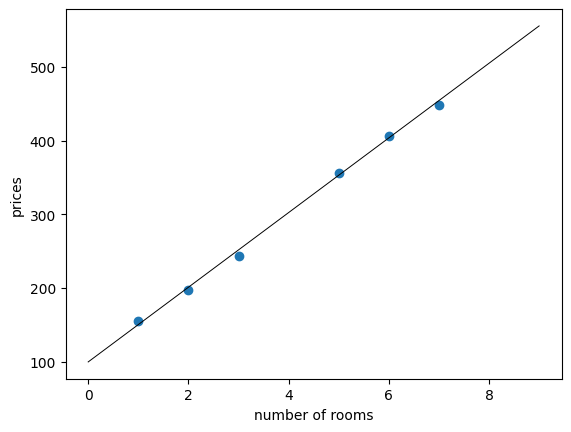

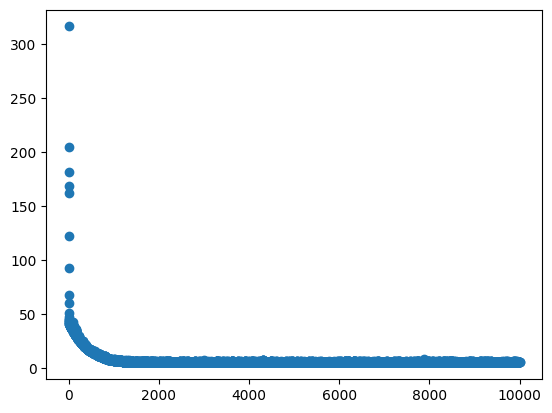

(50.65781332767556, 99.79504258184782)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Gradient Descent

In [ ]:
def gradient(features, labels, base_price, price_per_room, learning_rate):
  n = len(labels)
  sum_m = 0
  sum_c = 0

  for i in range(n):
    predictions = base_price + (price_per_room * features[i])
    sum_m += (predictions - labels[i]) * features[i]
    sum_c += predictions - labels[i]

  price_per_room -= (1/n) * learning_rate * sum_m
  base_price -= (1/n) * learning_rate * sum_c

  return price_per_room, base_price

Price per room: 52.29505495659464
Base price: 89.87068105439086


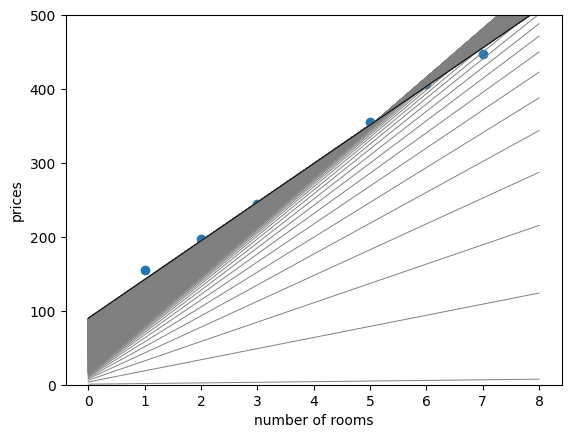

(52.29505495659464, 89.87068105439086)

In [ ]:
import random as rd

# Set the random seed to get consistent results
random.seed(0)

def linear_regression(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()

    for epochs in range(epochs):
      if(True):

        utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        x = rd.randint(0, len(features) - 1)
        num_rooms = features[x]
        price = labels[x]
        price_per_room, base_price = gradient(features, labels, base_price, price_per_room, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting = 0, ending = 8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()

    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

In [ ]:
import numpy as np

def gradient(features, labels, base_price, price_per_room, learning_rate):
        predicted = base_price + price_per_room * features
        error = predicted - labels

        gradient_base = base_price - learning_rate * (1/len(labels)) * np.mean(error)
        gradient_price = price_per_room - learning_rate * (1/len(labels)) * np.mean(error * features)

        base_price -= learning_rate * gradient_base
        price_per_room -= learning_rate * gradient_price

        return gradient_base, gradient_price

### Linear regression using sklearn



In [ ]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)

import numpy as np
from sklearn.linear_model import LinearRegression

features = np.array([1,2,3,5,6,7]).reshape((-1, 1))
labels = np.array([155, 197, 244, 356, 407, 448])

model = LinearRegression()
model.fit(features, labels)

new_features = np.array([5, 10]).reshape((-1, 1))
predicted_labels = model.predict(new_features)


print(predicted_labels)

model.score(features, labels)

[351.55952381 603.52380952]


0.9979437166148433

In [ ]:
# print the coefficients and bias of this model

print("Coefficients:", model.coef_)
print("Bias:", model.intercept_)

Coefficients: [50.39285714]
Bias: 99.59523809523819


In [ ]:
# use this model to predict the price of house that contains 4 rooms

new_features = np.array([4]).reshape((-1, 1))
predicted_price = model.predict(new_features)

print("Predicted price:", predicted_price)

Predicted price: [301.16666667]


### Normal Equation



In [ ]:
## TODO ##
# Use normal equation to get the weights
 # don't forget to concatenate ones to the features

import numpy as np

def Normal_Equation(features, labels):
    ones = np.ones((features.shape[0], 1))
    features = np.concatenate((ones, features), axis = 1)

    Weights = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(labels)

    return Weights

features = np.array([1,2,3,5,6,7]).reshape((-1, 1))
labels = np.array([155, 197, 244, 356, 407, 448])

Weights = Normal_Equation(features, labels)
print("Weights: ", Weights)

Weights:  [99.5952381  50.39285714]


### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize



# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Clean data

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


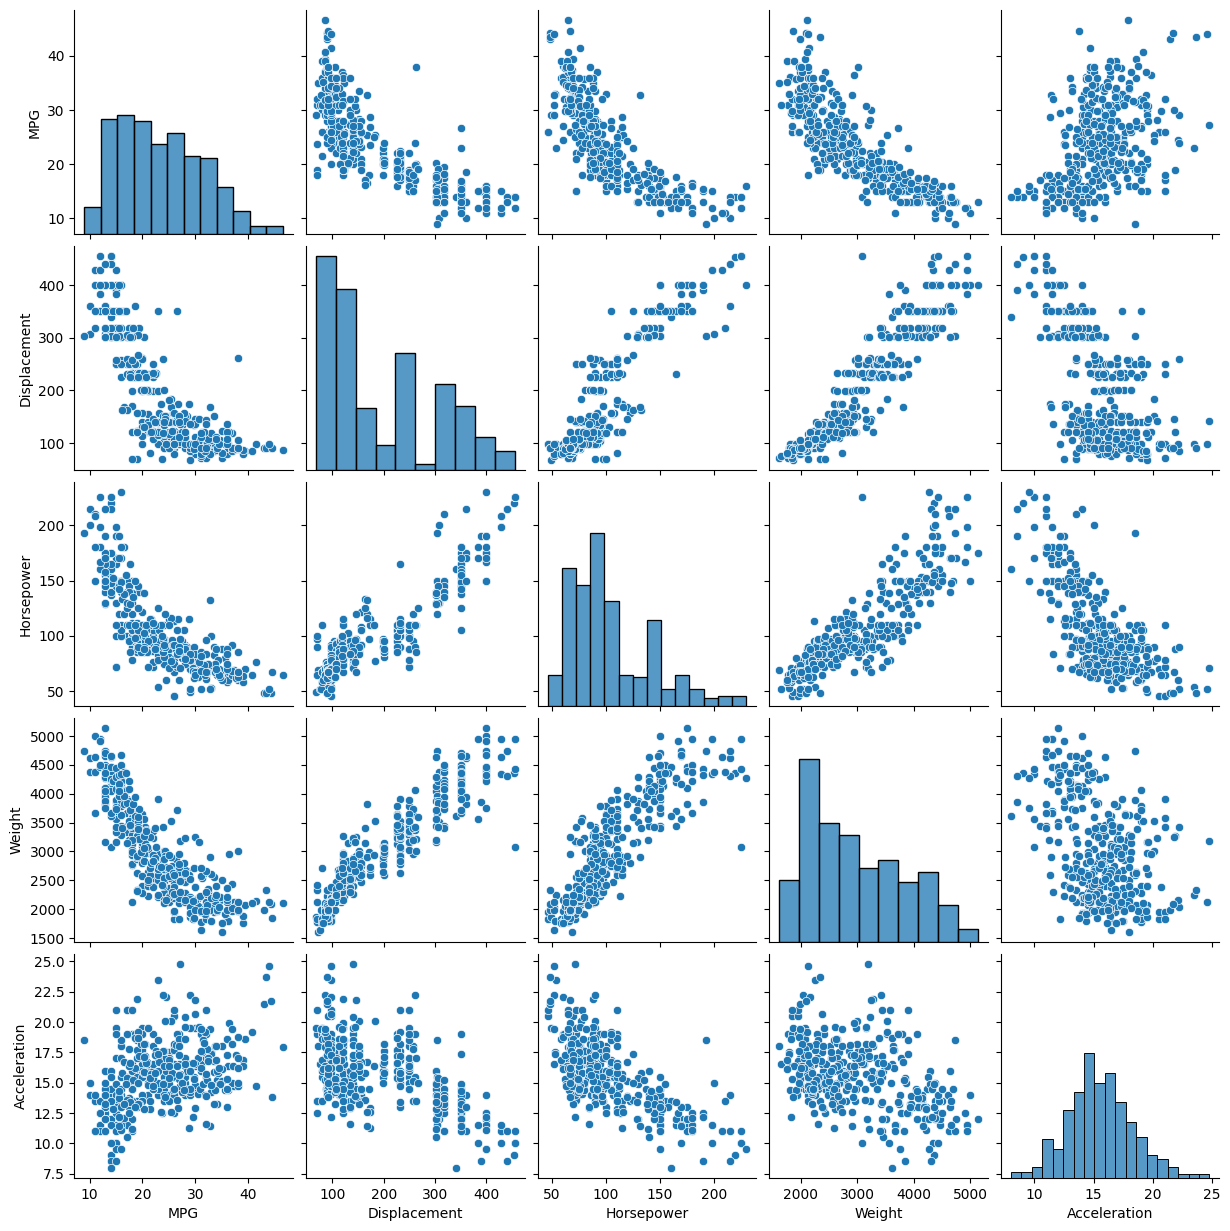

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
# use single-variable input to fit linear regression model

datasetXSingle = dataset[['Horsepower']]
datasetY = dataset[['MPG']]

X_train, X_test, y_train, y_test = train_test_split(datasetXSingle, datasetY, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients: ", model.coef_)
print("Accuracy ", model.score(X_train, y_train))

Coefficients:  [[-0.163]]
Accuracy  0.6121193728863614


In [ ]:
# use multi-variable input to fit linear regression model

datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

X_train, X_test, y_train, y_test = train_test_split(datasetXMulti, datasetY, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients: ", model.coef_)
print("Accuracy ", model.score(X_train, y_train))

Coefficients:  [[-0.342  0.019 -0.022 -0.006  0.042  0.797  0.848  1.179 -2.027]]
Accuracy  0.8286865575852228


In [ ]:
# use Normalized mlti-variable input to fit linear regression model

datasetXMulti = dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                            'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA']]
datasetY = dataset[['MPG']]


datasetXMulti_normalized = normalize(datasetXMulti)

X_train, X_test, y_train, y_test = train_test_split(datasetXMulti_normalized, datasetY, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients: ", model.coef_)
print("Accuracy ", model.score(X_train, y_train))

Coefficients:  [[   -729.802    -102.066    -176.181   -1495.499      -6.147    2078.354
  -102758.624 -103981.698 -106657.774]]
Accuracy  0.8666237955013077
